In [174]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


In [175]:
class LogReg(nn.Module):

    def __init__(self, input_dim, output_dim):
       
        super(LogReg, self).__init__()
        
        self.fc1 = nn.Linear(input_dim, output_dim)
        self.af = nn.ReLU()

    def forward(self, x_in):
        y = self.fc1(x_in)
        y = self.af(y)
        
        return y


# Punktewolken bauen

In [176]:
class PointCloudDataset(torch.utils.data.Dataset):
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.Y[idx]

In [177]:
def evaluate_model(model, data_loader):
    model.eval()
    correct = 0
    total = 0
    for x, y in data_loader:
        x = x.float()
        y = y.float()
        #normalize the labels to 0 and 1
        y = (y + 1) / 2
        
        y_pred = model(x.float()).flatten()
        y_pred = (y_pred > 0.5).float()
        correct += (y_pred == y.float()).sum().item()
        total += y.shape[0]
    return correct / total

In [178]:
def train_model(model: nn.Module, data_loader: torch.utils.data.DataLoader, n_epochs: int):
    optimizer = optim.Adam(params=model.parameters(), lr=0.01)
    bce_loss = nn.BCEWithLogitsLoss()
    
    for epoch in range(n_epochs):  # the model will train for a fixed number of epochs
        for x, y in data_loader:
            x = x.float()
            y = y.float()
            
            #the labels are either -1 or 1 so we need to convert them to 0 or 1
            y = (y + 1) / 2
            y_pred = model(x).squeeze()  # forward pass
            
            loss = bce_loss(y_pred, y)  # compute the loss
            loss.backward()
            optimizer.step()
            
    accuracy = evaluate_model(model, data_loader)
    print(f"Epoch {epoch + 1}, accuracy: {accuracy:.4%}")

In [198]:
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundry(model: nn.Module, X: np.ndarray, Y: np.ndarray):
    
    w = model.fc1.weight.detach().numpy()
    b = model.fc1.bias.detach().numpy()
    
    anstieg_boundary = (-b/w[0][1])/(b/w[0][0])
    
    xx = np.linspace(-4, 6)
    yy = (xx*anstieg_boundary)+(-b/w[0][1])

    # Plot der Datenpunkte
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
    plt.plot(xx,yy)

    # Achsenbeschriftungen
    plt.xlabel('X')
    plt.ylabel('Y')

    # Plot anzeigen
    plt.show()

# a) wo liegt die Boundary, wenn die Klassen klar linear separierbar sind 

Wenn die Klassen klar linear separierbar sind, dann liegt die Boundary zwischen den Klassen. Die Boundary ist die Linie, die die Klassen voneinander trennt.

Epoch 100, accuracy: 100.0000%


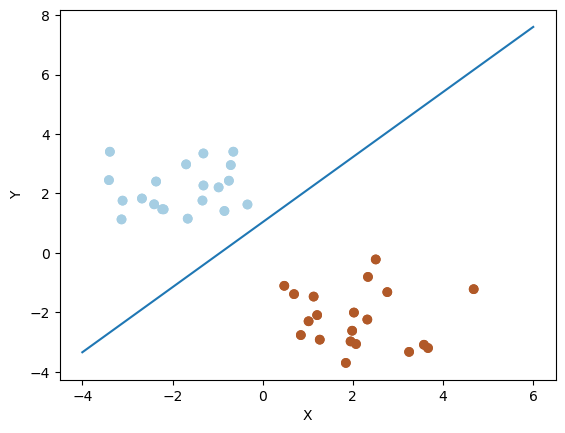

In [222]:
#create a dataset with clearly separable classes
c11 = -2
c12 = 2
c21 = 2
c22 = -2

s1 = np.random.randn(20, 2) + [c11, c12]
s2 = np.random.randn(20, 2) + [c21, c22]

X = np.r_[s1, s2]
Y = [-1] * 20 + [1] * 20
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

# create a dataset from the numpy arrays
dataset = PointCloudDataset(X, Y)

# create a data loader from the dataset
data_loader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True)

model1 = LogReg(2, 1)

train_model(model1, data_loader, n_epochs = 100)
plot_decision_boundry(model1, X, Y)

# b) wo liegt die Boundary, wenn die Klassen nicht linear separierbar sind?

Wenn die Klassen nicht linear separierbar sind, dann scheint die Boundary eine Klasse zu priorisieren und die andere Klasse eher zu ignorieren.

Epoch 100, accuracy: 70.0000%


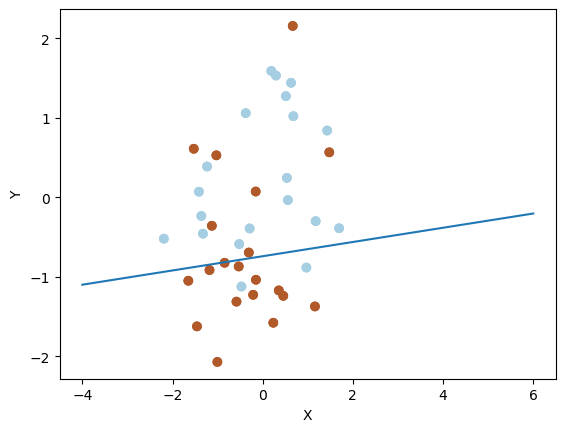

In [223]:
#create a dataset with not clearly separable classes
c11 = 0
c12 = 0.5
c21 = 0
c22 = -0.5

s1 = np.random.randn(20, 2) + [c11, c12]
s2 = np.random.randn(20, 2) + [c21, c22]

X = np.r_[s1, s2]
Y = [-1] * 20 + [1] * 20
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

# create a dataset from the numpy arrays
dataset = PointCloudDataset(X, Y)

# create a data loader from the dataset
data_loader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True)

model2 = LogReg(2, 1)

train_model(model2, data_loader, n_epochs = 100)
plot_decision_boundry(model2, X, Y)